In [1]:
#fix random seed
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
#import libraries
import numpy as np
import numpy
from numpy import array
from numpy import concatenate
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import math
from math import sqrt
#keras is the main package for nn and deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense
#considering LSTM nets
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
#if the training goes wrong
from keras.callbacks import EarlyStopping
import statsmodels.api as sm

In [2]:
#convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	#input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	#forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	#put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	#drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [3]:
#import files
from google.colab import files
 
 
uploaded = files.upload()

Saving cls_radio_flux_f8.csv to cls_radio_flux_f8.csv
Saving cls_radio_flux_f15.csv to cls_radio_flux_f15.csv
Saving cls_radio_flux_f30.csv to cls_radio_flux_f30.csv
Saving cls_radio_flux_f32.csv to cls_radio_flux_f32.csv
Saving cls_radio_flux_f107.csv to cls_radio_flux_f107.csv


In [3]:
#create a list of dataframes
df=[]    
df.append(pd.read_csv('cls_radio_flux_f8.csv'))
df.append(pd.read_csv('cls_radio_flux_f15.csv'))
df.append(pd.read_csv('cls_radio_flux_f30.csv'))
df.append(pd.read_csv('cls_radio_flux_f32.csv'))
df.append(pd.read_csv('cls_radio_flux_f107.csv'))

In [4]:
#join datasets
df[0]=df[0][['time (yyyy MM dd)','absolute_f8 (solar flux unit (SFU))']]
df[0]['absolute_f15 (solar flux unit (SFU))']=df[1]['absolute_f15 (solar flux unit (SFU))']
df[0]['absolute_f30 (solar flux unit (SFU))']=df[2]['absolute_f30 (solar flux unit (SFU))']
df[0]['absolute_f32 (solar flux unit (SFU))']=df[3]['absolute_f32 (solar flux unit (SFU))']
df[0]['absolute_f107 (solar flux unit (SFU))']=df[4]['absolute_f107 (solar flux unit (SFU))']

In [5]:
#change name
df = df[0]

In [6]:
#dataframe without dates
y = df[['absolute_f8 (solar flux unit (SFU))',	'absolute_f15 (solar flux unit (SFU))',	'absolute_f30 (solar flux unit (SFU))',	'absolute_f32 (solar flux unit (SFU))',	'absolute_f107 (solar flux unit (SFU))']]
n_vars = y.shape[1]

In [7]:
#compute lenght for graphs
X = ([x for x in range(0, len(y['absolute_f8 (solar flux unit (SFU))']))])

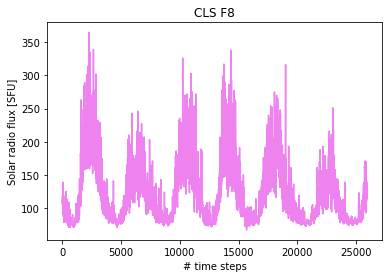

In [8]:
plt.title('CLS F8')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f8 (solar flux unit (SFU))'], color = 'violet', label = 'cls f8 original')

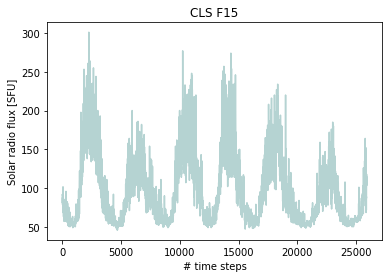

In [9]:
plt.title('CLS F15')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f15 (solar flux unit (SFU))'], color = '#b5d3d2', label = 'cls f15 original')

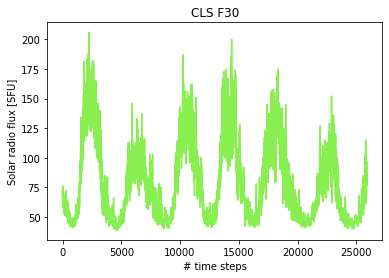

In [10]:
plt.title('CLS F30')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f30 (solar flux unit (SFU))'], color = '#89ef51', label = 'cls f30 original')

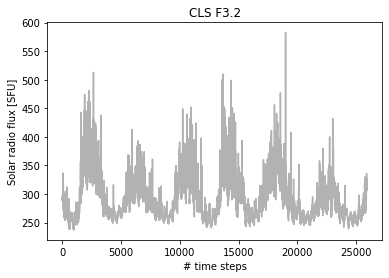

In [11]:
plt.title('CLS F3.2')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f32 (solar flux unit (SFU))'], color = '#b2b2b2', label = 'cls f32 original')

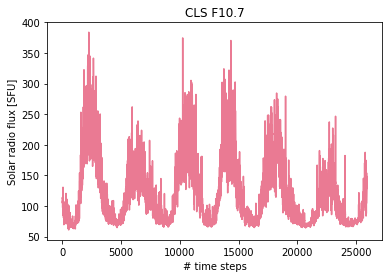

In [12]:
plt.title('CLS F10.7')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f107 (solar flux unit (SFU))'], color = '#ea7a93', label = 'cls f107 original')

In [13]:
#NumPy representation
values = y.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [14]:
#reframe for supervised learning
nin = 15
nout = 15
reframed = series_to_supervised(scaled, nin, nout)
reframed

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),var5(t-14),...,var1(t+13),var2(t+13),var3(t+13),var4(t+13),var5(t+13),var1(t+14),var2(t+14),var3(t+14),var4(t+14),var5(t+14)
15,0.149329,0.160784,0.188024,0.157895,0.143653,0.141611,0.153333,0.181437,0.152689,0.135604,...,0.161074,0.150196,0.171856,0.183632,0.135604,0.161074,0.156863,0.180240,0.181319,0.154180
16,0.141611,0.153333,0.181437,0.152689,0.135604,0.139597,0.149412,0.176647,0.152689,0.139938,...,0.161074,0.156863,0.180240,0.181319,0.154180,0.147651,0.161961,0.196407,0.151822,0.133437
17,0.139597,0.149412,0.176647,0.152689,0.139938,0.131879,0.135686,0.160479,0.152111,0.143344,...,0.147651,0.161961,0.196407,0.151822,0.133437,0.117450,0.143529,0.180240,0.139965,0.114861
18,0.131879,0.135686,0.160479,0.152111,0.143344,0.150671,0.164706,0.191617,0.152689,0.164396,...,0.117450,0.143529,0.180240,0.139965,0.114861,0.107383,0.126667,0.164072,0.132736,0.105263
19,0.150671,0.164706,0.191617,0.152689,0.164396,0.161074,0.178039,0.204192,0.160787,0.164706,...,0.107383,0.126667,0.164072,0.132736,0.105263,0.107383,0.114510,0.147904,0.146327,0.105573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25884,0.187919,0.165098,0.227545,0.239445,0.148297,0.167785,0.170588,0.215569,0.222094,0.152012,...,0.191275,0.239608,0.269461,0.213418,0.229412,0.194631,0.236863,0.281437,0.222094,0.229412
25885,0.167785,0.170588,0.215569,0.222094,0.152012,0.177852,0.160392,0.227545,0.236553,0.134056,...,0.194631,0.236863,0.281437,0.222094,0.229412,0.191275,0.241176,0.293413,0.216310,0.229412
25886,0.177852,0.160392,0.227545,0.236553,0.134056,0.144295,0.180392,0.209581,0.196067,0.161300,...,0.191275,0.241176,0.293413,0.216310,0.229412,0.204698,0.245098,0.311377,0.224986,0.235604
25887,0.144295,0.180392,0.209581,0.196067,0.161300,0.154362,0.180392,0.215569,0.198959,0.213932,...,0.204698,0.245098,0.311377,0.224986,0.235604,0.218121,0.254902,0.305389,0.230769,0.235604


In [15]:
#drop columns not to be predicted
reframedd = reframed.iloc[:,0:nin*n_vars-1]
for i in range(nin*n_vars-1, reframed.shape[1], n_vars):
  reframedd= pd.concat([reframedd, reframed.iloc[:,i]], axis=1)

reframedd

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),var5(t-14),...,var5(t+5),var5(t+6),var5(t+7),var5(t+8),var5(t+9),var5(t+10),var5(t+11),var5(t+12),var5(t+13),var5(t+14)
15,0.149329,0.160784,0.188024,0.157895,0.143653,0.141611,0.153333,0.181437,0.152689,0.135604,...,0.113003,0.120743,0.126316,0.127864,0.124768,0.127864,0.133746,0.143653,0.135604,0.154180
16,0.141611,0.153333,0.181437,0.152689,0.135604,0.139597,0.149412,0.176647,0.152689,0.139938,...,0.120743,0.126316,0.127864,0.124768,0.127864,0.133746,0.143653,0.135604,0.154180,0.133437
17,0.139597,0.149412,0.176647,0.152689,0.139938,0.131879,0.135686,0.160479,0.152111,0.143344,...,0.126316,0.127864,0.124768,0.127864,0.133746,0.143653,0.135604,0.154180,0.133437,0.114861
18,0.131879,0.135686,0.160479,0.152111,0.143344,0.150671,0.164706,0.191617,0.152689,0.164396,...,0.127864,0.124768,0.127864,0.133746,0.143653,0.135604,0.154180,0.133437,0.114861,0.105263
19,0.150671,0.164706,0.191617,0.152689,0.164396,0.161074,0.178039,0.204192,0.160787,0.164706,...,0.124768,0.127864,0.133746,0.143653,0.135604,0.154180,0.133437,0.114861,0.105263,0.105573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25884,0.187919,0.165098,0.227545,0.239445,0.148297,0.167785,0.170588,0.215569,0.222094,0.152012,...,0.232508,0.207740,0.235604,0.235604,0.235604,0.263467,0.266563,0.229412,0.229412,0.229412
25885,0.167785,0.170588,0.215569,0.222094,0.152012,0.177852,0.160392,0.227545,0.236553,0.134056,...,0.207740,0.235604,0.235604,0.235604,0.263467,0.266563,0.229412,0.229412,0.229412,0.229412
25886,0.177852,0.160392,0.227545,0.236553,0.134056,0.144295,0.180392,0.209581,0.196067,0.161300,...,0.235604,0.235604,0.235604,0.263467,0.266563,0.229412,0.229412,0.229412,0.229412,0.235604
25887,0.144295,0.180392,0.209581,0.196067,0.161300,0.154362,0.180392,0.215569,0.198959,0.213932,...,0.235604,0.235604,0.263467,0.266563,0.229412,0.229412,0.229412,0.229412,0.235604,0.235604


In [16]:
#NumPy
values=reframedd.values

In [17]:
#split into train and test
train_size = int(len(reframedd['var1(t-1)'] ) * 0.8)
train = values[:train_size, :]
test = values[train_size:, :]

In [18]:
#split into inputs and outputs
n_obs = nin*n_vars
train_X, train_y = train[:, :n_obs], train[:, -nout:]
test_X, test_y = test[:, :n_obs], test[:, -nout:]
print(train_X.shape, len(train_X), train_y.shape)
train_y

(20699, 75) 20699 (20699, 15)


array([[0.12074303, 0.12724458, 0.11702786, ..., 0.14365325, 0.13560372,
        0.15417957],
       [0.12724458, 0.11702786, 0.11393189, ..., 0.13560372, 0.15417957,
        0.13343653],
       [0.11702786, 0.11393189, 0.11671827, ..., 0.15417957, 0.13343653,
        0.11486068],
       ...,
       [0.01486068, 0.01114551, 0.0123839 , ..., 0.01671827, 0.01640867,
        0.01578947],
       [0.01114551, 0.0123839 , 0.01331269, ..., 0.01640867, 0.01578947,
        0.01702786],
       [0.0123839 , 0.01331269, 0.01671827, ..., 0.01578947, 0.01702786,
        0.01424149]])

In [19]:
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], nin, n_vars))
test_X = test_X.reshape((test_X.shape[0], nin, n_vars))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(20699, 15, 5) (20699, 15) (5175, 15, 5) (5175, 15)


In [20]:
#number of neurons
nn = 8

In [21]:
#architechture
model = Sequential()
#input layer
model.add(LSTM(nn, return_sequences=True, activation='tanh', input_shape=(train_X.shape[1], train_X.shape[2])))
#first hidden layer
model.add(LSTM(nn, activation='tanh', return_sequences=True))
#second
model.add(LSTM(nn, activation='tanh'))
# output set to forecast nout values
model.add(Dense(15))
#compile
model.compile(optimizer = 'adam', loss = 'mse')
#summarize
model.summary()
#fit
history=model.fit(train_X, train_y, epochs = 38, batch_size = 2, verbose = 2, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 8)             448       
                                                                 
 lstm_1 (LSTM)               (None, 15, 8)             544       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense (Dense)               (None, 15)                135       
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/38
8280/8280 - 63s - loss: 0.0069 - val_loss: 0.0067 - 63s/epoch - 8ms/step
Epoch 2/38
8280/8280 - 52s - loss: 0.0044 - val_loss: 0.0039 - 52s/epoch - 6ms/step
Epoch 3/38
8280/82

In [23]:
#make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

162/162 [==============================] - 1s 3ms/step


In [24]:
#NumPy
reframedd = reframedd.values

In [26]:
#compute and make a list of all the rmse, predicted and observed values, and relative error
rmse = []
pred = []
obs = []
re = []
for i in range(0, nout):
  a = pd.DataFrame(reframedd[train_size:, :4])
  a['pred']=testPredict[:, i]
  a = scaler.inverse_transform(a)
  a = pd.DataFrame(a)
  b = pd.DataFrame(reframedd[train_size:, :4])
  b['obs'] = reframedd[train_size:, -(nout-i)]
  b = scaler.inverse_transform(b)
  b = pd.DataFrame(b)
  aa = pd.DataFrame()
  aa['pred'] = a[4]
  pred.append(aa['pred'])
  aa['obs'] = b[4]
  obs.append(aa['obs'])
  aa['diff'] = aa['obs']-aa['pred']
  aa['abs_error'] = abs(aa['diff'])
  aa['relative_error'] = aa['abs_error']/aa['obs']
  re.append(aa['relative_error'])
  from sklearn.metrics import mean_squared_error
  rms = np.sqrt(mean_squared_error(aa['obs'], aa['pred']))
  rmse.append(rms)

In [27]:
#print rmse
rmse

[5.3813598159699225,
 6.915333087707577,
 8.75003175463436,
 10.248875541542603,
 11.57063076886353,
 12.58279577416406,
 13.419583252920562,
 13.942109127098224,
 14.231957751389192,
 14.43704704058601,
 14.56302631337647,
 14.682491227922691,
 14.71613872950682,
 14.72691218957092,
 14.709740813767544]

In [44]:
#to shift test
z= ([x for x in range(train_size, train_size+len(testPredict))])

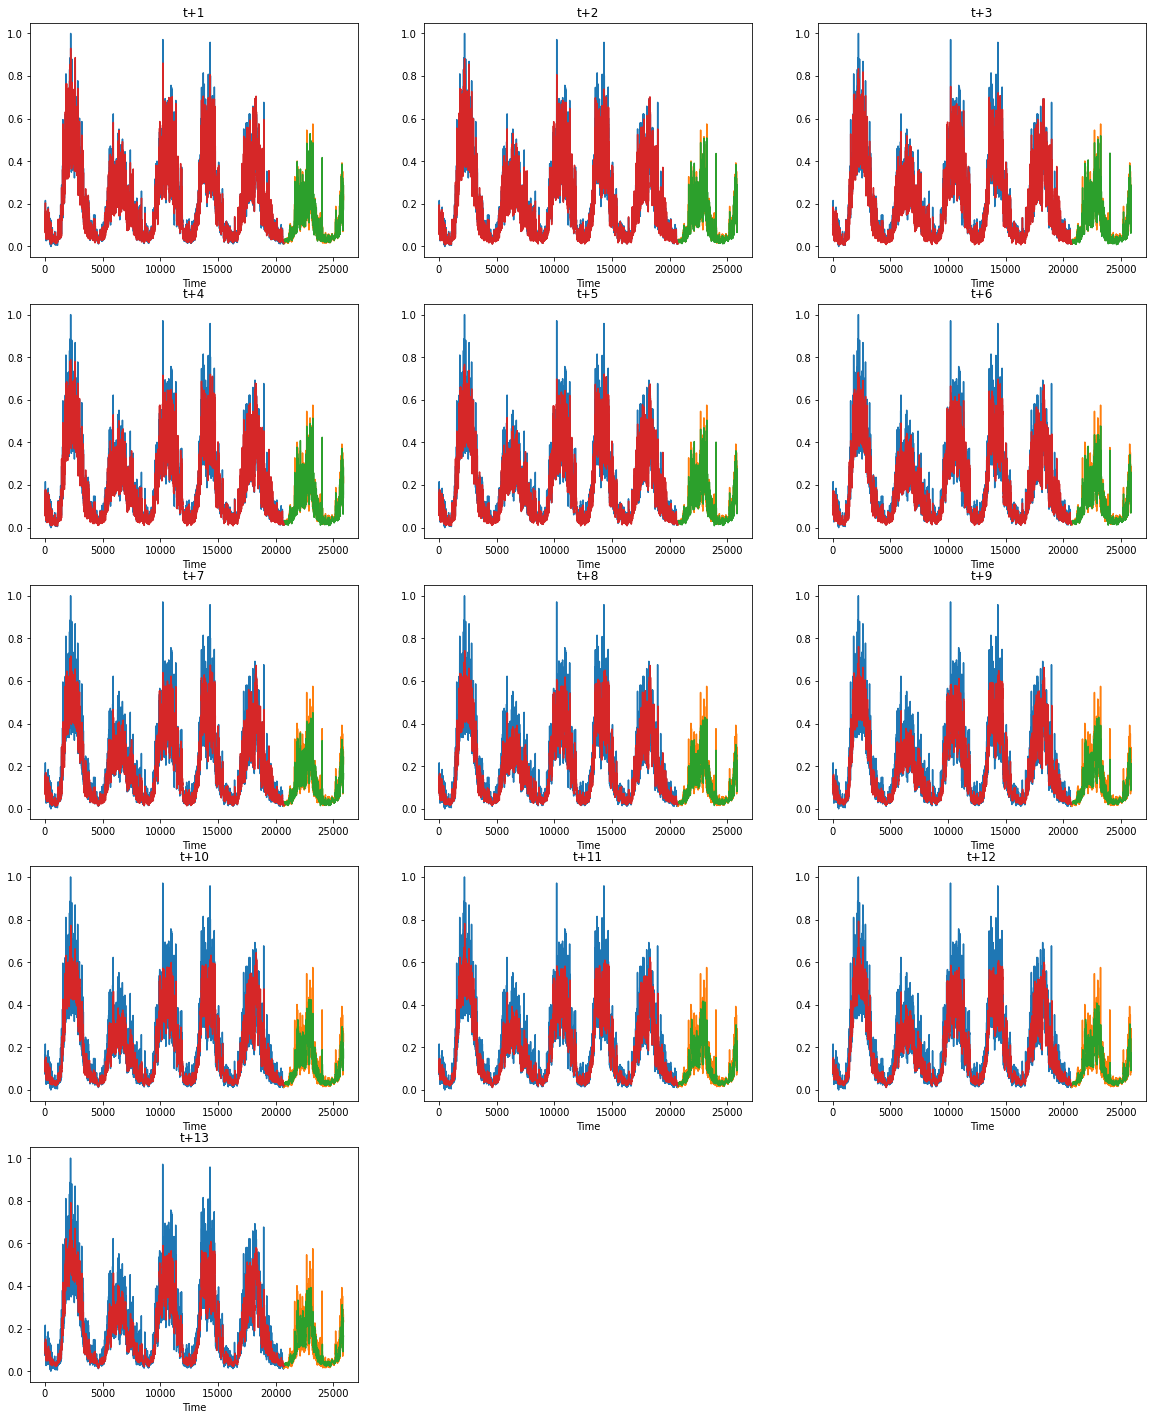

In [54]:
#train and test observed and predicted (normalized)
fig, axes = plt.subplots(3, 4, figsize = (20, 25))
for i in range(1, nout-1):
  plt.subplot(5, 3, i)
  plt.plot(reframedd[:train_size, -(nout-i)])
  plt.plot(z, reframedd[train_size:, -(nout-i)])
  plt.plot(z, testPredict[:, -(nout-i)])
  plt.plot(trainPredict[:, -(nout-i)])
  plt.title('t+%d' % i)
  plt.xlabel('Time', fontsize = 10)

Text(0.5, 1.0, 't')

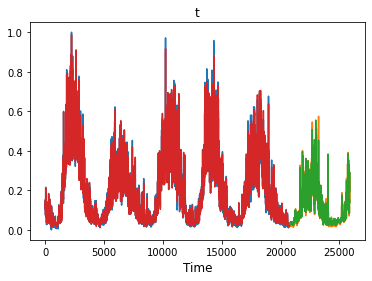

In [55]:
#predictions and observed for t+14 
plt.plot(reframedd[:train_size, -15])
plt.plot(z, reframedd[train_size:,-15])
plt.plot(z, testPredict[:, -15])
plt.plot(trainPredict[:, -15])
plt.xlabel('Time', fontsize = 12)
plt.title('t')

Text(0.5, 1.0, 't+14')

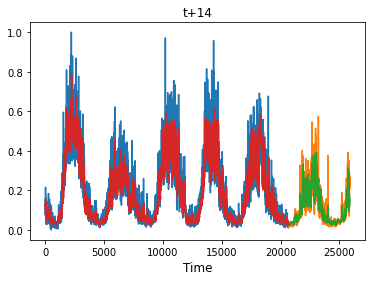

In [53]:
#predictions and observed for t+14 
plt.plot(reframedd[:train_size, -1])
plt.plot(z, reframedd[train_size:,-1])
plt.plot(z, testPredict[:, -1])
plt.plot(trainPredict[:, -1])
plt.xlabel('Time', fontsize = 12)
plt.title('t+14')

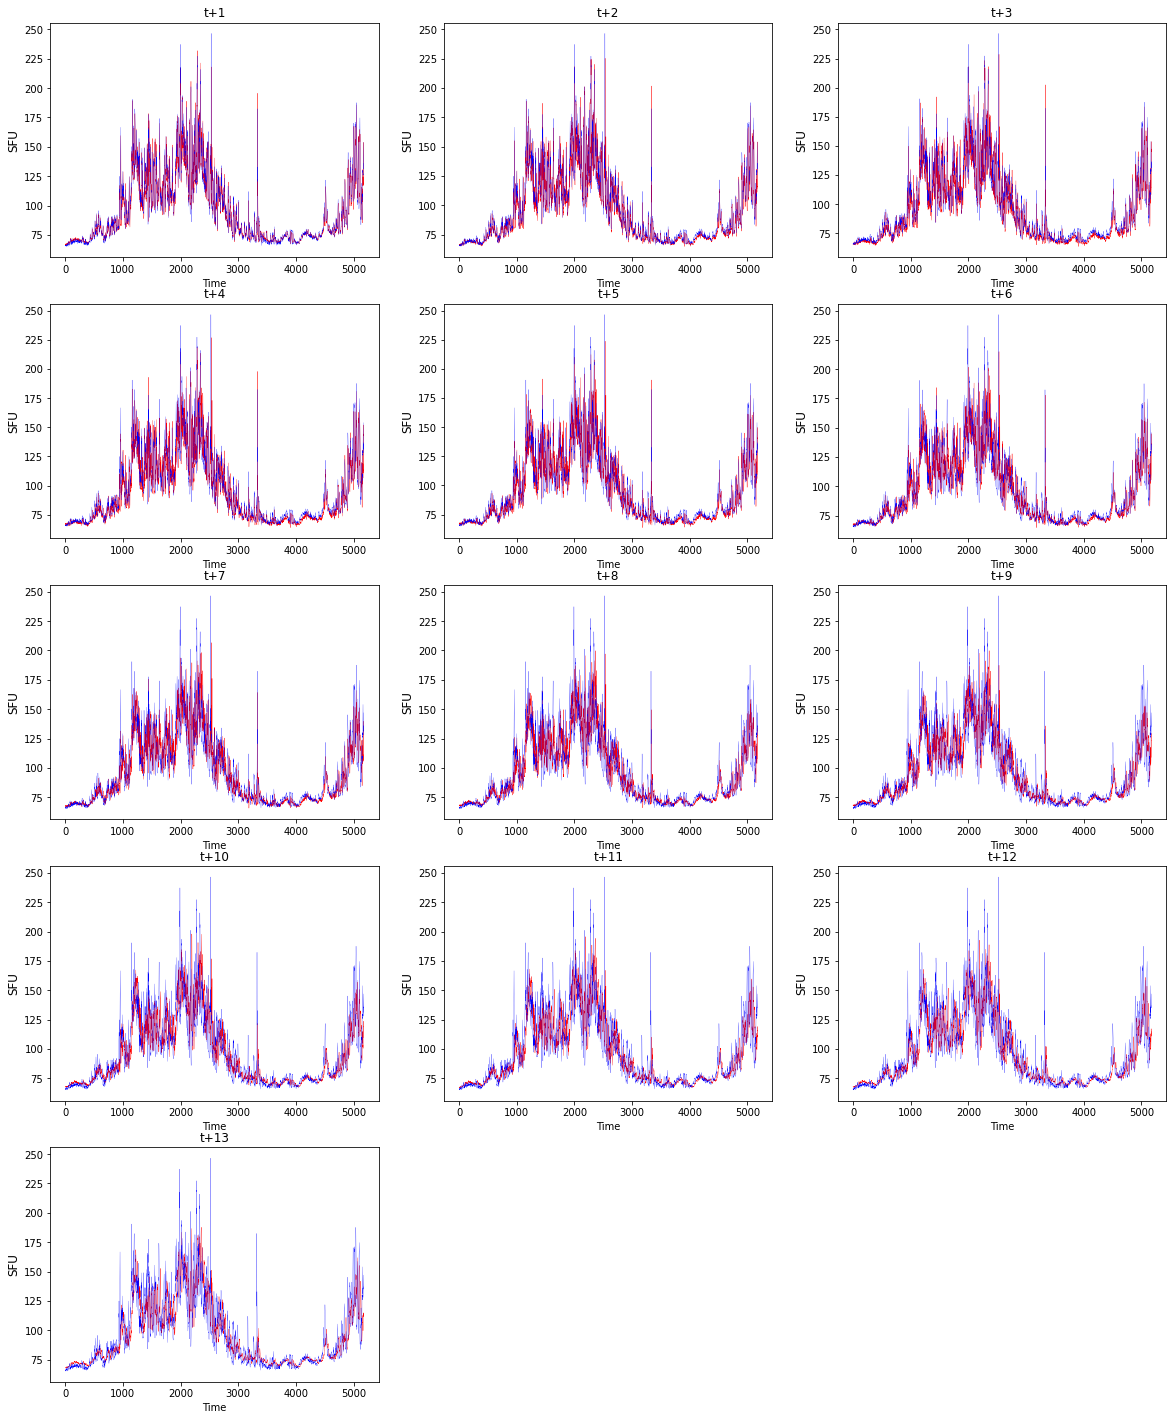

In [52]:
# graphs of +1, ..., +13 predictions (test detail)
fig, axes = plt.subplots(3, 4, figsize = (20, 25))
for i in range(1, nout-1):
  plt.subplot(5, 3, i)
  plt.plot(pred[i], linewidth = 0.3, color = 'r')
  plt.plot(obs[i], linewidth = 0.2, color = 'b')
  plt.ylabel('SFU', fontsize = 12)
  plt.xlabel('Time', fontsize = 10)
  plt.title('t+%d' % i)

Text(0.5, 1.0, 't')

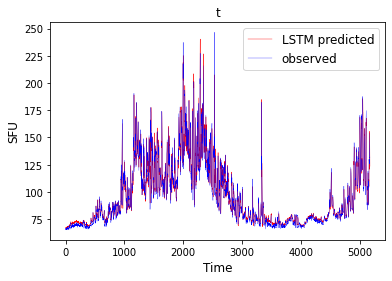

In [51]:
#nowcast graph
plt.plot(pred[0], linewidth = 0.4, color = 'r', label = 'LSTM predicted')
plt.plot(obs[0], linewidth = 0.3, color = 'b', label = 'observed')
plt.legend(fontsize = 12)
plt.ylabel('SFU', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('t')

Text(0.5, 1.0, 't+14')

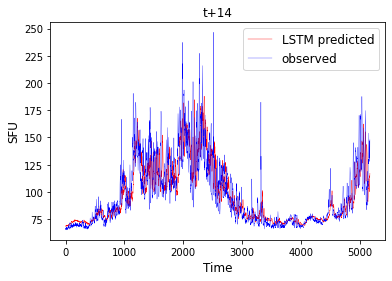

In [30]:
#graph of +14 prediction
plt.plot(pred[14],linewidth = 0.4, color='r', label = 'LSTM predicted')
plt.plot(obs[14],linewidth = 0.3, color='b', label = 'observed')
plt.legend(fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('SFU', fontsize = 12)
plt.title('t+14')

In [31]:
#compute the total errors and show it
tot_err = []
for i in range(0, nout):
  tot_err.append(re[i].sum())
tot_err

[164.56556172861164,
 191.73095779881126,
 250.71185083154236,
 309.065830462931,
 338.56070207604944,
 369.71690616831415,
 390.96208365011194,
 407.5383328954818,
 418.0899483725956,
 428.0463068552528,
 434.3251551659949,
 436.66482928768204,
 440.4176764529087,
 445.4748117084496,
 454.2188435318103]

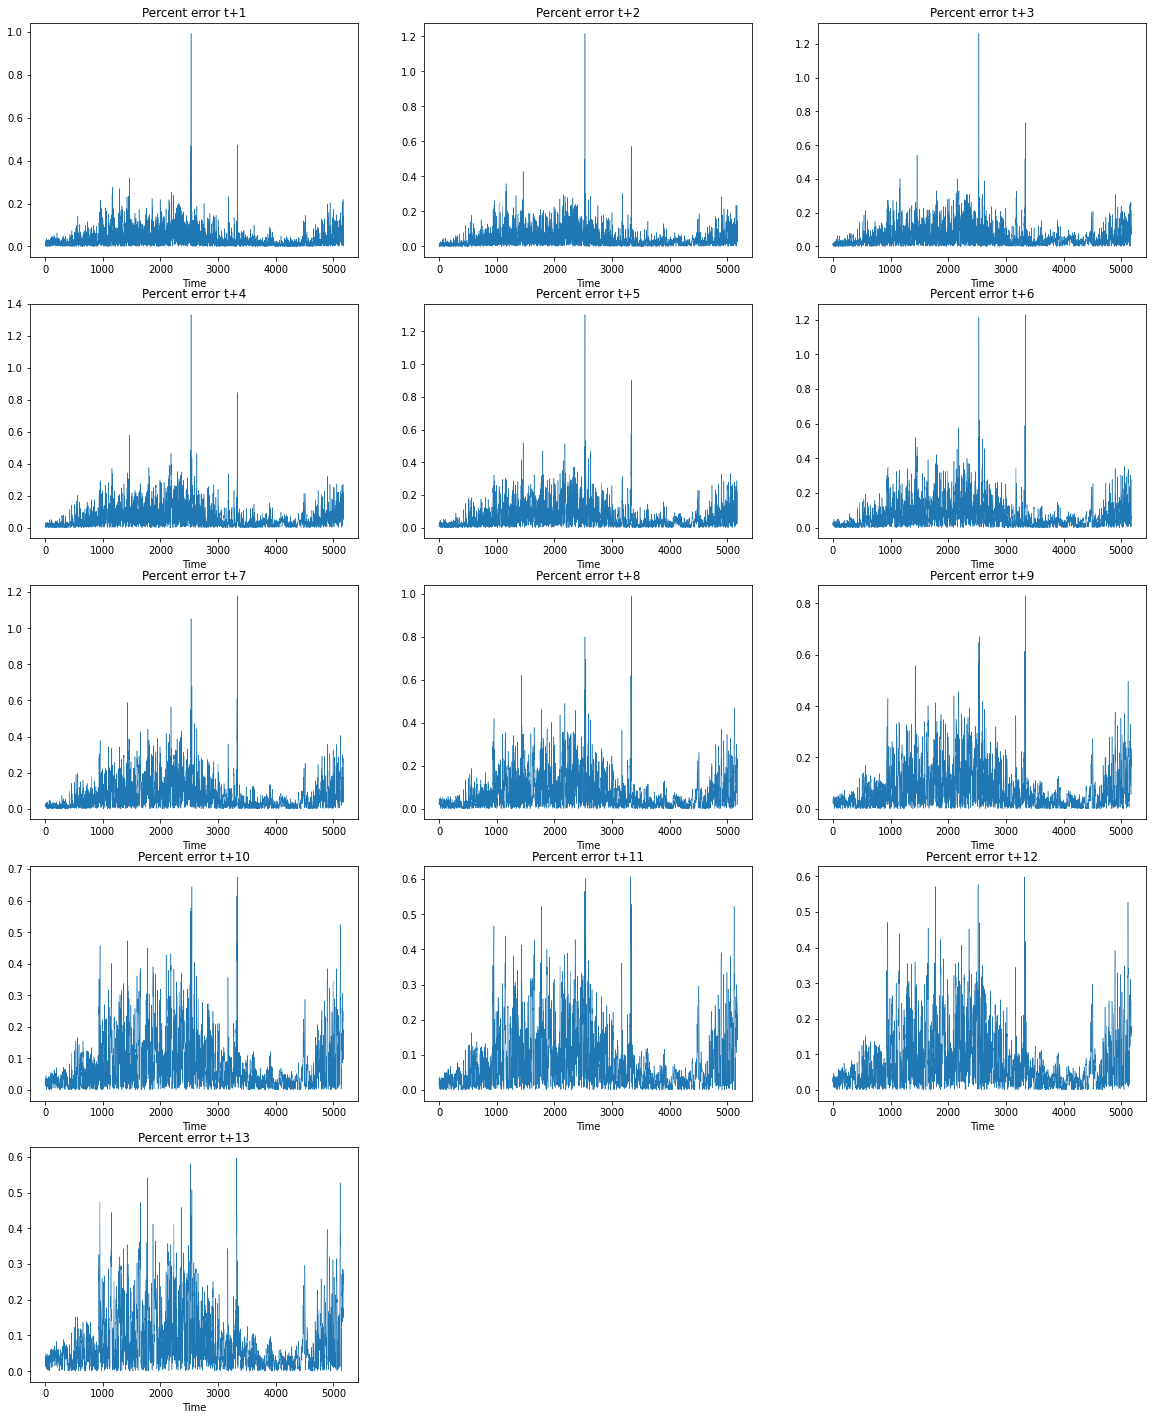

In [56]:
#graphs of +1, ..., +13 percent error
fig, axes = plt.subplots(3, 4, figsize = (20, 25))
for i in range(1,nout-1):
  plt.subplot(5,3,i)
  plt.plot(re[i],lw = 0.5)
  plt.title('Percent error t+%d' % i)
  plt.xlabel('Time', fontsize = 10)

Text(0.5, 0, 'Time')

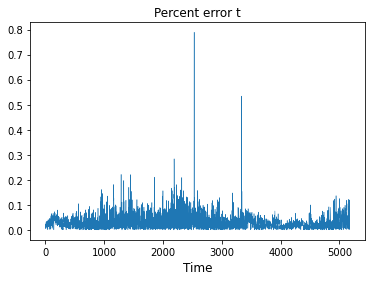

In [57]:
#nowcast percent error
plt.plot(re[0], lw = 0.5)
plt.title('Percent error t')
plt.xlabel('Time', fontsize = 12)

Text(0.5, 0, 'Time')

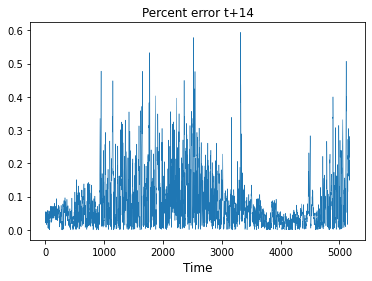

In [58]:
#+14 percent error
plt.plot(re[14], lw = 0.5)
plt.title('Percent error t+14')
plt.xlabel('Time', fontsize = 12)

In [35]:
#compute correlation and show it
correlation = []
for i in range(0,nout):
  correlation.append(obs[i].corr(pred[i]))

correlation

[0.9828268482919682,
 0.9717039770603517,
 0.9561549255547723,
 0.9402675141957438,
 0.9213081112044815,
 0.9057418664306655,
 0.8910666085948417,
 0.8811738098654595,
 0.874836592648962,
 0.8705251290641136,
 0.8677626910247853,
 0.8658206881091645,
 0.8647218252882217,
 0.8640298589774917,
 0.8635883100861667]

In [36]:
#model evaluation
print(model.evaluate(test_X,test_y))

162/162 [==============================] - 3s 4ms/step - loss: 0.0015
0.001542246202006936


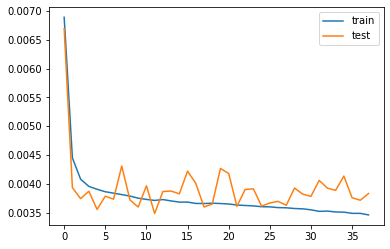

In [22]:
#plot history
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()